In [2]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [108]:
# Upload data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv(os.listdir()[1])

# Clean and merge
df['country'] = df['country'].replace({'United States': 'United States of America',
                        'Bosnia and Herzegovina': 'Bosnia and Herz.',
                        'Dominican Republic': 'Dominican Rep.'})

world_merged = world.merge(df, left_on = 'name', right_on = 'country', how = 'left')
world_merged = world_merged[~(world_merged['name'] == 'Antarctica')]

In [110]:
set(df.country).difference(set(world_merged['name'].unique()))

{'Malta', 'Singapore'}

In [269]:
def plot_areas(world_merged, no_edges = True):
    """Plot the world in rural areas
    
    Args:
        world_merged (dataframe): dataframe containing geospatial data
        
    Returns:
        None
    """
    
    missing_kwds = dict(color='#D3D3D3', label='No Data')
    
    fig, ax = plt.subplots(1,1, figsize = (30,15))
    
    world_merged.plot(column='individualism_index',
                      ax = ax, 
                      legend = True,
                      legend_kwds = {'label': 'Individualism index',
                                     'orientation': 'horizontal',
                                     'shrink': 0.4},
                      edgecolor = 'none',
                      cmap = 'Blues',
                      missing_kwds = missing_kwds)
    if no_edges:
        ax.axis('off')
        
    plt.subplots_adjust(top=0.7)
    fig.savefig('mapfig.png')

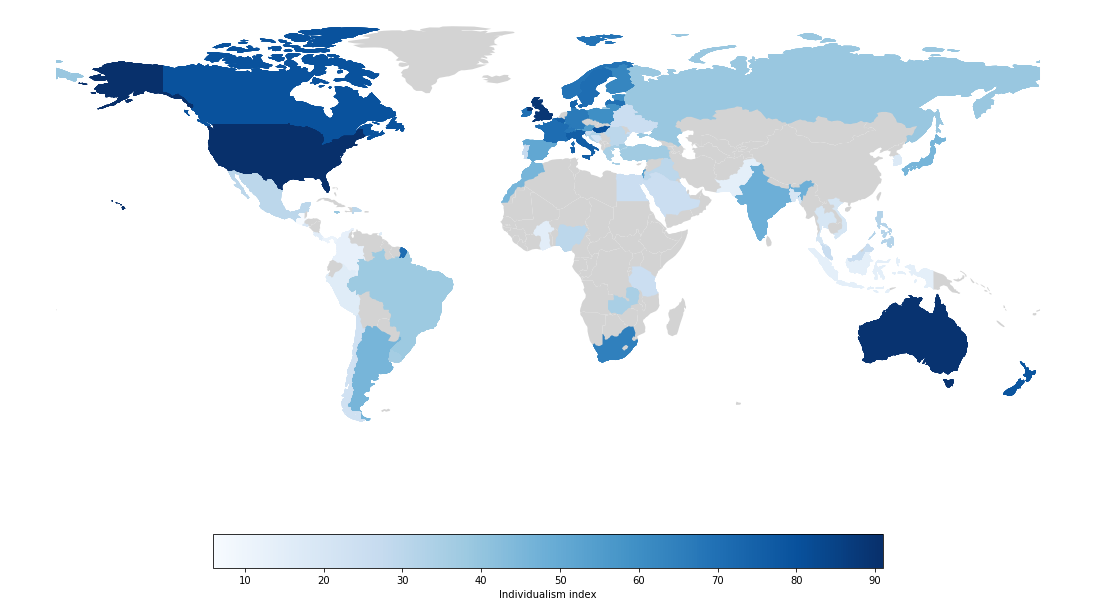

In [270]:
plot_areas(world_merged)

In [79]:
world_merged['t'] = world_merged['individualism_index'].map(lambda x: -10 if pd.isnull(x) else x)